# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 
Pymaceuticals, is a top medical research company, creating state-of-the-art anti-cancer medications in the industry. This most recent quarterly summary focuses on screening various treatment options that have the most positive effects against a common skin cancer called Squamous Cell Carinoma (SCC). In this study, 249 lab mice infected with SCC tumors were observed and measured over the course of 45 days to determine which drug treatment regimen produced the best preliminary results. The analysis weighed Pymaceuticals top medication for treatment of SCC, Capomulin, against several other drugs, to determine which produced the best outcomes overall in the fight against SCC. Numerous charts and graphs are included in the report that highlights statistical and technical data that will prove imperative to the next step in the decision making process moving into the next round of clinical trials.
Among the first steps in the process of generating valid and reliable data to analyze, was merging, sorting, and cleaning the data.  One example error, found during the data cleaning process, was related to a key variable, one of the test subjects. Specifically, Mouse ID #g989 returned duplicate values in both the Mouse ID and Timepoints column. An accurate count of the number of mice was generated, returning a total of 249 mice, but unfortunately, the data recorded in the duplicate values columns were not equivalent. These results could most likely indicate one of two things: either there were two mice who mistakenly received the same Mouse ID, or the systems personnel in charge of collecting the measurments made some mistakes when recording Mouse ID #g989's chart information. Therefore, Mouse ID #g989 was removed from the data to prevent inaccuracies in the distributions, regressions, and measures of central tendency. 
Another useful and key insight from the data set was the various numerical points of correlation. Correlation in statistical analysis measures the relationship between two variables that co-occur in a data set. The value identified as "r" quantifies the strength and direction between two variables in a linear relationship. The numerical value of "r" has a set range from negative 1 to 1, where a positive linear relationship equals positive numbers up to 1, a negative number in the set range equals a negative linear relationship, and an "r" value of zero equals no linear relationship. An analysis of the line graph calculated in the data set titled "Tumor Size Comparison After 45-Day Treatment Regimen for Mouse b128," shows that there is a negative correlation between the Tumor's Volume, and the 45-period Timepoint. In other words, the Line Graph clearly illustrates that as the treatment regimen moved closer to the 45-day trial period, the volume of the tumor decreased when the top performing drug, Capomulin was administered. It's important to note that correlated variables do not mean that one directly causes the other to change. However, it does imply that the variables have a higher chance of relationally occurring simultaneously. 
Finally, when analyzing the top performing treatment drugs amongst Capomulin, Ramicane, Infubinol, and Ceftamin, it was found, based on analysis of several plots and graphs generated from the data, that Capomulin and Ramicane were clearly the most effective medical treatment options out of the four. Therefore, moving forward, Pymaceuticals, should continue with clinical trials, where Capomulin and Ramicane are observed and measured in a study spanning further beyond 45 days to determine the effects an extended time period would have on the test subjects and drug performance outcomes.


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame, do a left join of both tables using the column they have in common "Mouse ID"
# Join the largest table,"Study_results" to the "Mouse_Metadata" table to have the largest table on the left in the leftjoin
# We can do a left join or an inner join, either one will work since our Mouse ID's will be represented on both tables
# Remember the "inner" join is the default join when you use the .merge function without specifying the type of join
# to specify the type of join just add , how="left") to the end of row 19 df =...on = "Mouse ID", how="left")
df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the newly merged data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Look at the Mouse MetaData to help combine it into a single DataFrame
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Look at the Study Results Data to help combine it into a single DataFrame
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Check the Timpoint column for 45 days as listed in the Background
study_results.Timepoint.unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [5]:
# Run a value_counts of the Timepoint column to see how many mice remained after each 5 day interval of 45 total days
study_results.Timepoint.value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [7]:
# Run a .head and a .info to summarize the newly merged dataframe and display non-null values
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Run a .head and a .info to summarize the newly merged dataframe and display non-null values
df.info()

# The table shows that we have 1893 rows, identified by Mouse ID, Timepoint, etc., 
# The table shows that we have no missing values
# The table shows that our data types (Dtype) consists of string(object), int, float, int, string, string, int, int
# The table looks good to go for analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [2]:
# Checking the number of mice. Use Brackets and exact column name in quotes to return the specific values unique to that column
# Use the Brackets and the Column Name in Quotes because of the space in between Mouse and ID, since the space is a foreign character
df["Mouse ID"].nunique()

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# array["g989"] Mouse ID is repeating, which means it is corrupted since we should only have one Mouse ID per each Time Point, with no duplicates
# so run a groupby of the 2 columns, group by .size to get the # of rows belonging to this group so we should have one row for each mouse and timepoint
# and then add a .sort_values (ascending=False) to sort and locate the duplicate mouse

df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [11]:
# Optional: Get all the data for the duplicate mouse ID using the .loc filter
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID using the Boolean mask method.
# Create a cleand DataFrame by creating a df2 and resetting the index
# You do not have to overwrite the data frame. You can use the original one to drop the duplicate mouse
mask = df["Mouse ID"] !="g989"
df2 = df.loc[mask].reset_index(drop=True)
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [13]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM (Standard Error of the Mean) of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

means = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stds= df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

pd.DataFrame({"Mean": means,
             "Median": medians,
             "Var": variances,
             "Std": stds,
             "Sem": sems})

In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

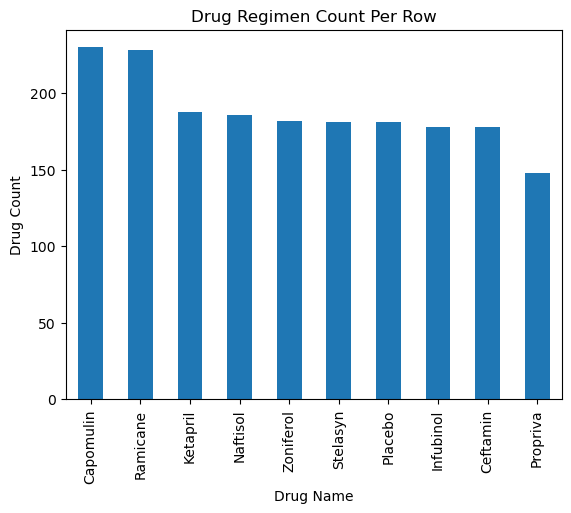

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# df2["Drug Regimen"].value_counts()
# vals = values for the number of rows(Mouse ID/Timepoints) for each drug regimen...230 rows of Capomulin, etc.,

vals = df2["Drug Regimen"].value_counts()
vals.plot(kind="bar", xlabel="Drug Name", ylabel="Drug Count", title="Drug Regimen Count Per Row")
plt.show()

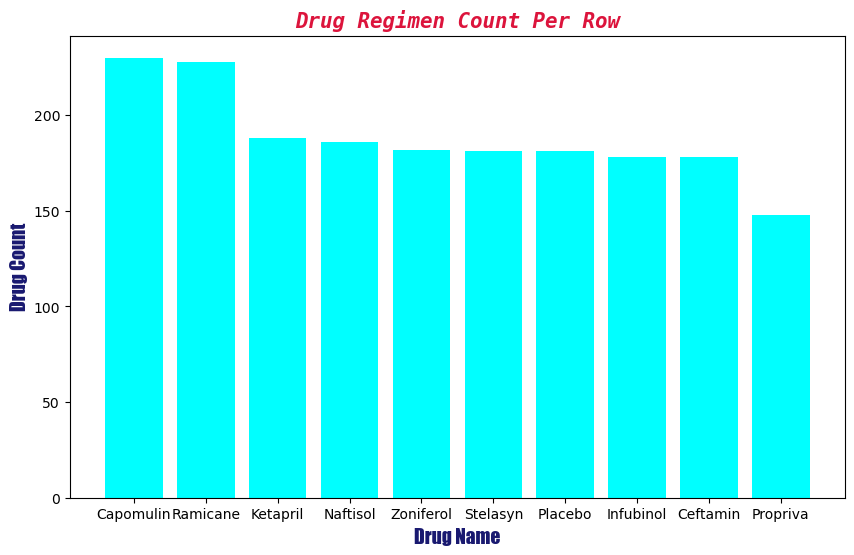

In [128]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# df2["Drug Regimen"].value_counts()
# vals = values for the number of rows(Mouse ID/Timepoints) for each drug regimen...230 rows of Capomulin, etc.,

vals = df2["Drug Regimen"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(vals.index, vals, color="cyan")

plt.xlabel("Drug Name", fontweight="book", fontsize=14, fontstyle="oblique", fontfamily="fantasy", color="midnightblue")
plt.ylabel("Drug Count", fontweight="book", fontsize=14, fontstyle="oblique", fontfamily="fantasy", color="midnightblue")
plt.title("Drug Regimen Count Per Row", fontweight="demibold", fontsize=15, fontstyle="oblique", fontfamily="monospace", color="crimson")

plt.show()

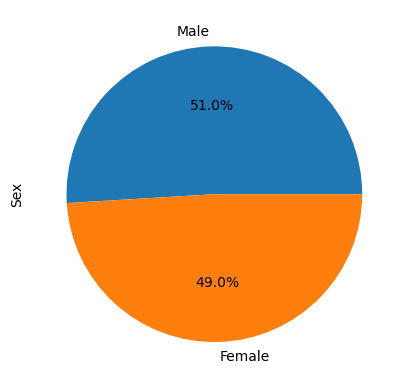

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
vals = df2["Sex"].value_counts()

vals.plot(kind="pie", autopct="%1.1f%%")
plt.show()

In [40]:
vals

Male      958
Female    922
Name: Sex, dtype: int64

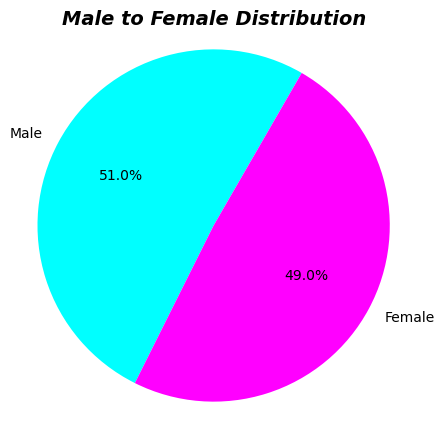

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pies = vals.index
pie_votes = vals

colors = ["cyan", "magenta"]

# Step 2 - Make a Basic Plot
plt.figure(figsize=(5,5))
plt.pie(pie_votes, labels=pies, colors=colors, autopct="%1.1f%%",  startangle=60)

# Step 3 - Set the Pie Chart with Equal Axes, then Customize Pie Chart
plt.axis("equal")
plt.title("Male to Female Distribution", fontweight="bold", fontsize=14, fontstyle="oblique" )

plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [52]:
# max lifetime of each mouse = max timepoint for each mouse
max_time = df2.groupby("Mouse ID", as_index=False).Timepoint.max()

df3 = pd.merge(max_time, df2, on=["Mouse ID", "Timepoint"], how="left")
df3.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [53]:
# Verify one row per mouse id
df3["Mouse ID"].value_counts()

a203    1
s121    1
q597    1
q610    1
q633    1
       ..
j246    1
j296    1
j365    1
j755    1
z969    1
Name: Mouse ID, Length: 248, dtype: int64

In [79]:
import seaborn as sns


<Axes: xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)'>

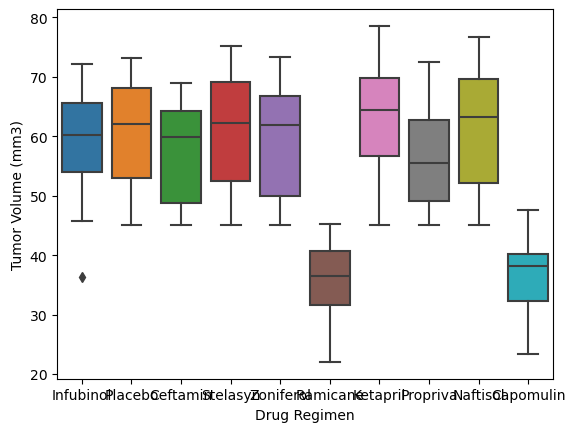

In [66]:
sns.boxplot(df3, x="Drug Regimen", y="Tumor Volume (mm3)")


<Axes: xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)'>

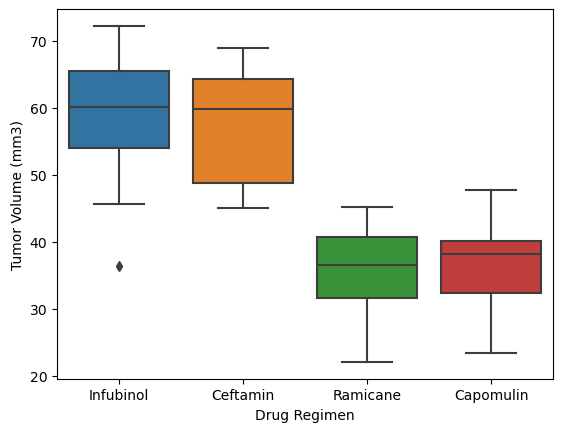

In [71]:
# Filter by Drug Regimen Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df4 =df3.loc[df3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
#Create a side by side box plot using Seaborn
sns.boxplot(df4, x="Drug Regimen", y="Tumor Volume (mm3)")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_lists = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
        
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sub =df3.loc[df3["Drug Regimen"] == drug]
    
    # add subset 
    tumor = sub["Tumor Volume (mm3)"]
    tumor_lists.append(tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([0.25, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1

    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)

    outliers = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print(drug)
    print(outliers)


Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


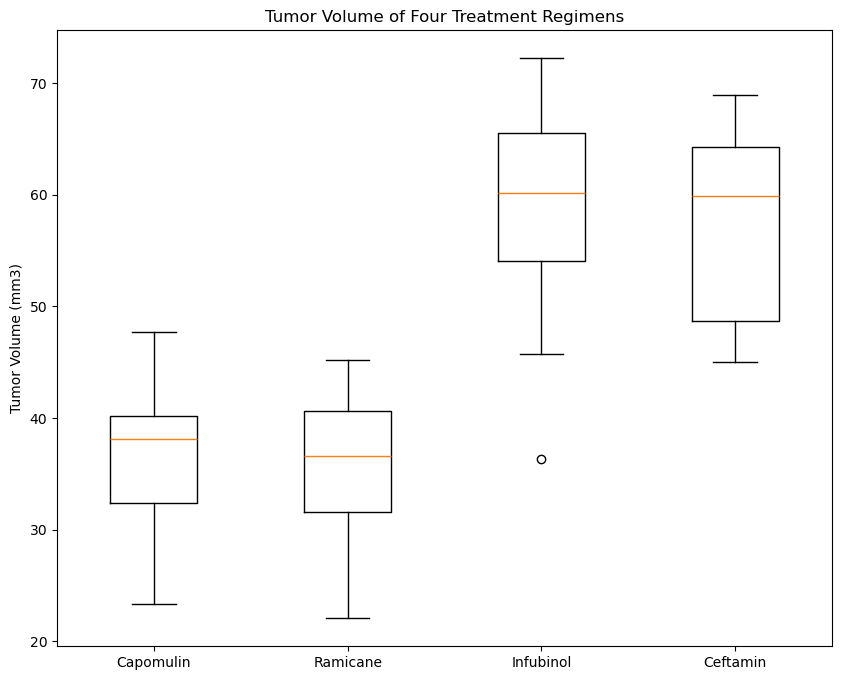

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,8))
plt.boxplot(tumor_lists, labels=drugs)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of Four Treatment Regimens")
plt.show()


## Line and Scatter Plots

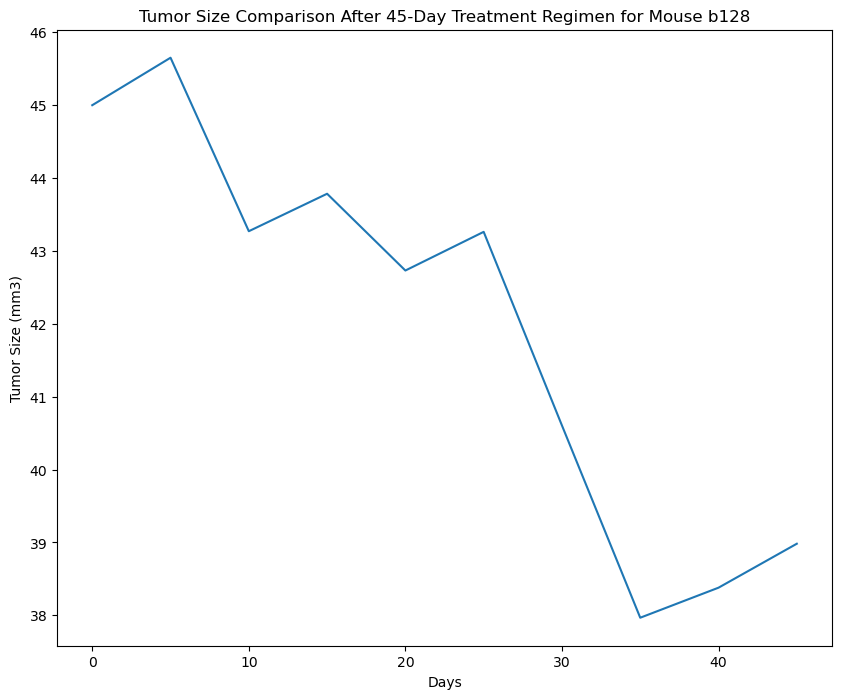

In [97]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#df2.loc[df2["Drug Regimen"] == "Capomulin"]
mouse = "b128"

sub_mouse = df2.loc[df2["Mouse ID"] == mouse]

plt.figure(figsize=(10,8))
plt.plot(sub_mouse.Timepoint, sub_mouse["Tumor Volume (mm3)"])
plt.xlabel("Days")
plt.ylabel("Tumor Size (mm3)")
plt.title(f"Tumor Size Comparison After 45-Day Treatment Regimen for Mouse {mouse}")
plt.show()

In [99]:
# Get the data to create a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = df2.loc[df2["Drug Regimen"] == "Capomulin"]

data = cap_df.groupby("Mouse ID", as_index=False).agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
# data.corr() can be used to show the positive correlation between the mouse's weight and the Tumor Volume


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22.0,41.963636
1,b742,21.0,40.083699
2,f966,17.0,36.505973
3,g288,19.0,41.990097
4,g316,22.0,44.613344
5,i557,24.0,44.805810
6,i738,20.0,39.141053
7,j119,23.0,44.465236
8,j246,21.0,43.216925
9,l509,21.0,44.434474


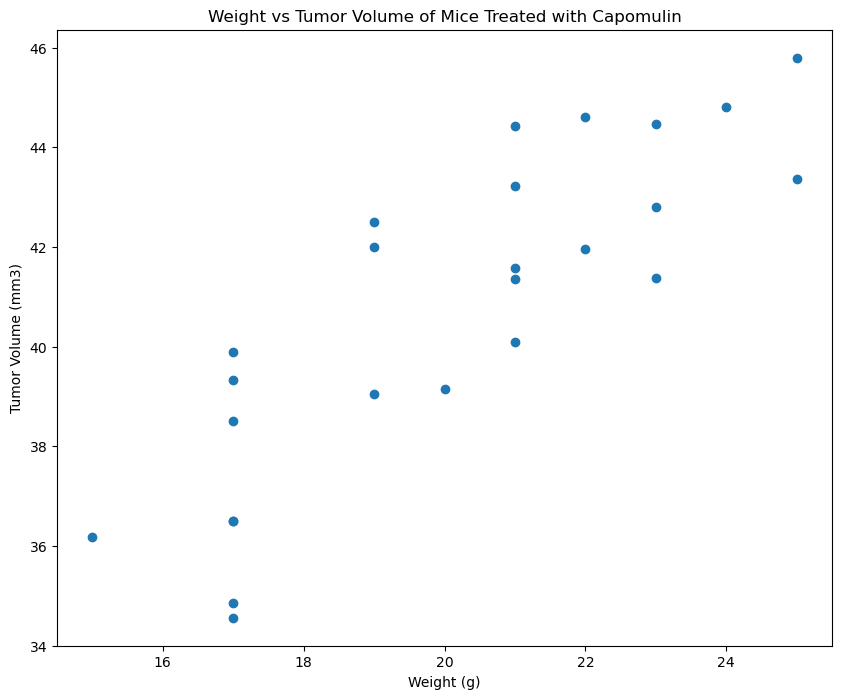

In [103]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = cap_df.groupby("Mouse ID", as_index=False).agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})

plt.figure(figsize=(10, 8))
plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume of Mice Treated with Capomulin")
plt.show()

## Correlation and Regression

In [104]:
from scipy.stats import linregress

0.8419363424694719
The correlation is 0.8419363424694719
The r-squared is: 0.7088568047708723


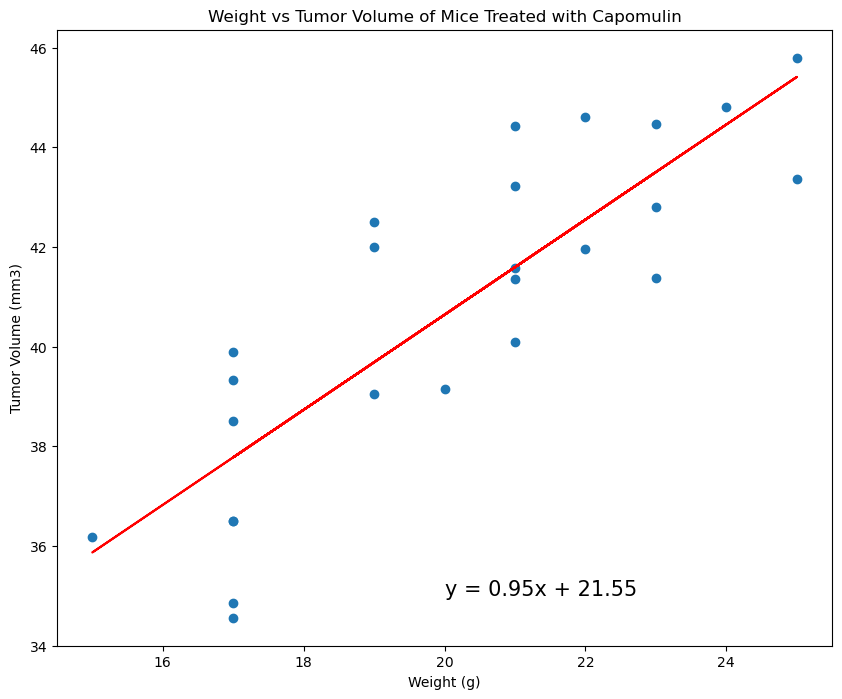

In [115]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the line of best fit
# Print out the r-squared value along with the plot.
cap_df = df2.loc[df2["Drug Regimen"] == "Capomulin"]

data = cap_df.groupby("Mouse ID", as_index=False).agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
data.corr() 

x_values = data["Weight (g)"]
y_values = data["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
data = cap_df.groupby("Mouse ID", as_index=False).agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})

plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 35),fontsize=15,color="black")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

corr = data.corr()["Weight (g)"]["Tumor Volume (mm3)"]
print(corr)
print(f"The correlation is {corr}")
print(f"The r-squared is: {rvalue**2}")
plt.title("Weight vs Tumor Volume of Mice Treated with Capomulin")
plt.show()


In [98]:
# Calculate the correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen
df2.loc[df2["Drug Regimen"] == "Capomulin"].corr()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Timepoint,1.000000,-0.584271,0.584006,-0.057964,-0.035271
Tumor Volume (mm3),-0.584271,1.000000,-0.313092,-0.021604,0.525700
Metastatic Sites,0.584006,-0.313092,1.000000,0.006748,-0.119149
Age_months,-0.057964,-0.021604,0.006748,1.000000,-0.169172
Weight (g),-0.035271,0.525700,-0.119149,-0.169172,1.000000
